<a href="https://colab.research.google.com/github/anisdeladesela/Project/blob/main/Supervised%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Challenges ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Lab Challenges kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [ ]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

#### Import dataset

In [ ]:
mobil = pd.read_csv(r'C:\Users\user\OneDrive\Shift Academy\Automobile_data.csv')

**quick look**

In [ ]:
mobil.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
mobil.shape

(205, 26)

In [ ]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [ ]:
mobil.duplicated().any()

False

In [ ]:
mobil.isnull().sum()
#Di hasil ini tidak terdapat yang null, namun sebetulnya terdapat null dalam bentuk tanda tanya

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Missing Values and Data Type**

In [ ]:
mobil.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
#Melihat kolom normalized-losses ketika barisnya berisi tanda tanya
mobil.loc[mobil['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [ ]:
#Mengganti '?' di semua kolom di data mobil dengan 'nan'


columns = list(mobil.columns)
#Membuat variabel kolom yang berisikan list dari nama kolom data mobil

for kolom in columns:
    mobil.loc[mobil[kolom]=='?', kolom] = np.nan

In [ ]:
mobil.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['Kolom', 'Jumlah']
    #data total nullnya ingin dijadikan kolom
    #kolom pertama adalah kolom, kolom kedua adalah jumlah
    
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['Kolom', 'Persen']
    #Persentase missing value terhadap keseluruhan data
    #kolom pertama adalah kolom, kolom kedua adalah persen
    
    miss = miss1.merge(miss2, how = 'inner', on = 'Kolom')
    #Merge miss 1 dengan miss 2
    
    miss = miss[miss['Jumlah'] != 0]
    #Filter sehingga yang muncul hanya kolom dengan missing values
    
    
    #Ingin membuat tipe data ada di dataframe
    kolom_miss = list(miss['Kolom'])
    tipe = []
    data = []
    for kolom in kolom_miss:
        tipe.append(mobil[kolom].dtype)
        data.append(mobil[kolom][100]) #100 biar contohnya jelas
    miss['Tipe'] = tipe
    miss['Contoh'] = data
    return miss

In [ ]:
missing_data(mobil)
#Tipe di normalized-losses, bore, stroke, horsepower, peak-rpm, price masih object. seharusnya num

,Kolom,Jumlah,Persen,Tipe,Contoh
1,normalized-losses,41,20.00000,object,106
5,num-of-doors,2,0.97561,object,four
18,bore,4,1.95122,object,3.33
19,stroke,4,1.95122,object,3.47
21,horsepower,2,0.97561,object,97
22,peak-rpm,2,0.97561,object,5200
25,price,4,1.95122,object,9549


In [ ]:
def non_missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['Kolom', 'Jumlah']
    miss2 = pd.DataFrame(mobil.isnull().sum()/mobil.shape[0]*100).reset_index()
    miss2.columns = ['Kolom', 'Persen']
    miss = miss1.merge(miss2, how = 'inner', on = 'Kolom')
    miss =  miss[miss['Jumlah'] == 0]
    kolom_miss = list(miss['Kolom'])
    tipe = []
    data = []
    for kolom in kolom_miss:
        tipe.append(mobil[kolom].dtype)
        data.append(mobil[kolom][100])
    miss['Tipe'] = tipe
    miss['Contoh'] = data
    return miss

In [ ]:
non_missing_data(mobil)
#Tipe data di non missing value sudah betul semua

,Kolom,Jumlah,Persen,Tipe,Contoh
0,symboling,0,0.0,float64,0
2,make,0,0.0,object,nissan
3,fuel-type,0,0.0,object,gas
4,aspiration,0,0.0,object,std
6,body-style,0,0.0,object,sedan
7,drive-wheels,0,0.0,object,fwd
8,engine-location,0,0.0,object,front
9,wheel-base,0,0.0,float64,97.2
10,length,0,0.0,float64,173.4
11,width,0,0.0,float64,65.2


In [ ]:
#Mengubah tipe data
miss_float = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for kolom in miss_float:
    mobil[kolom] = mobil[kolom].astype('float')
#diubah ke float karena numpy hanya support dari object ke float tidak bisa ke int

In [ ]:
missing_data(mobil)

,Kolom,Jumlah,Persen,Tipe,Contoh
1,normalized-losses,41,20.00000,float64,106
5,num-of-doors,2,0.97561,object,four
18,bore,4,1.95122,float64,3.33
19,stroke,4,1.95122,float64,3.47
21,horsepower,2,0.97561,float64,97
22,peak-rpm,2,0.97561,float64,5200
25,price,4,1.95122,float64,9549


In [ ]:
miss_float.pop()

'price'

In [ ]:
miss_float

for kolom in miss_float:
    mobil[kolom] = mobil[kolom].fillna(mobil[kolom].median())

In [ ]:
mobil['num-of-doors'] = mobil['num-of-doors'].fillna(mobil['num-of-doors'].mode()[0])

In [ ]:
missing_data(mobil)

,Kolom,Jumlah,Persen,Tipe,Contoh
25,price,4,1.95122,float64,9549.0


In [ ]:
#Akan drop missing value, karena hanya tersisa sedikit missing valuenya

mobil.dropna(inplace = True)

In [ ]:
mobil.shape
#4 rows dihapus, jadi total rowsnya 201

(201, 26)

In [ ]:
#Reset index karena rowsnya berkurang
mobil.reset_index(inplace = True)

In [ ]:
mobil.head(3)
#indexnya tercopy menjadi kolom

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


In [ ]:
#menghapus kolom index
mobil.drop('index', axis = 1, inplace = True)

In [ ]:
mobil.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


## Data Visualization

**Make Some Visualization**

In [ ]:
#Fuel type dengan target
mobil['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

<AxesSubplot:xlabel='price', ylabel='Density'>

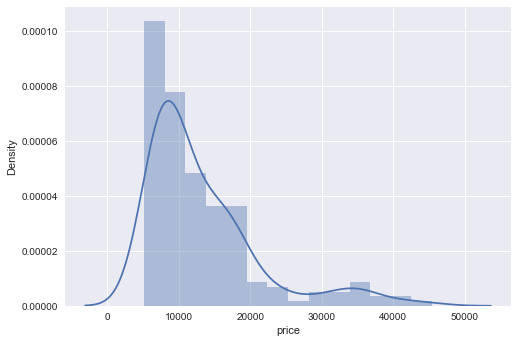

In [ ]:
sns.distplot(mobil['price'])

**Apakah tipe bahan bakar memengaruhi harga?**

<AxesSubplot:xlabel='price', ylabel='Density'>

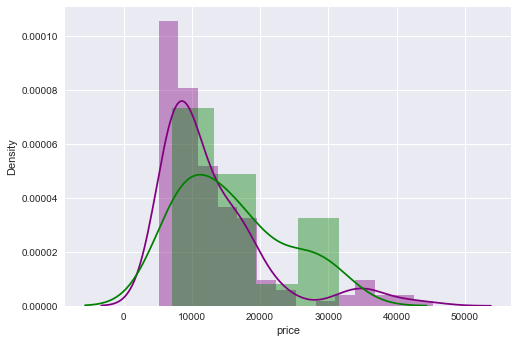

In [ ]:
sns.distplot(mobil[mobil['fuel-type'] == 'gas']['price'], color = 'purple')
sns.distplot(mobil[mobil['fuel-type'] == 'diesel']['price'], color = 'green')
#diesel terlihat lebih mahal, lebih condong ke kanan

In [ ]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    float64
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    float64
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
mobil['symboling'].unique()

array([ 3.,  1.,  2.,  0., -1., -2.])

In [ ]:
mobil.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,120.711443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,32.111623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


**Berapa korelasi dari masing-masing variabel numerik?**

In [ ]:
numerik = pd.DataFrame(mobil, columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
          'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])
numerik

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
197,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
198,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
199,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [ ]:
mobil['symboling'].unique()

array([ 3.,  1.,  2.,  0., -1., -2.])

In [ ]:
korelasi = numerik.corr()

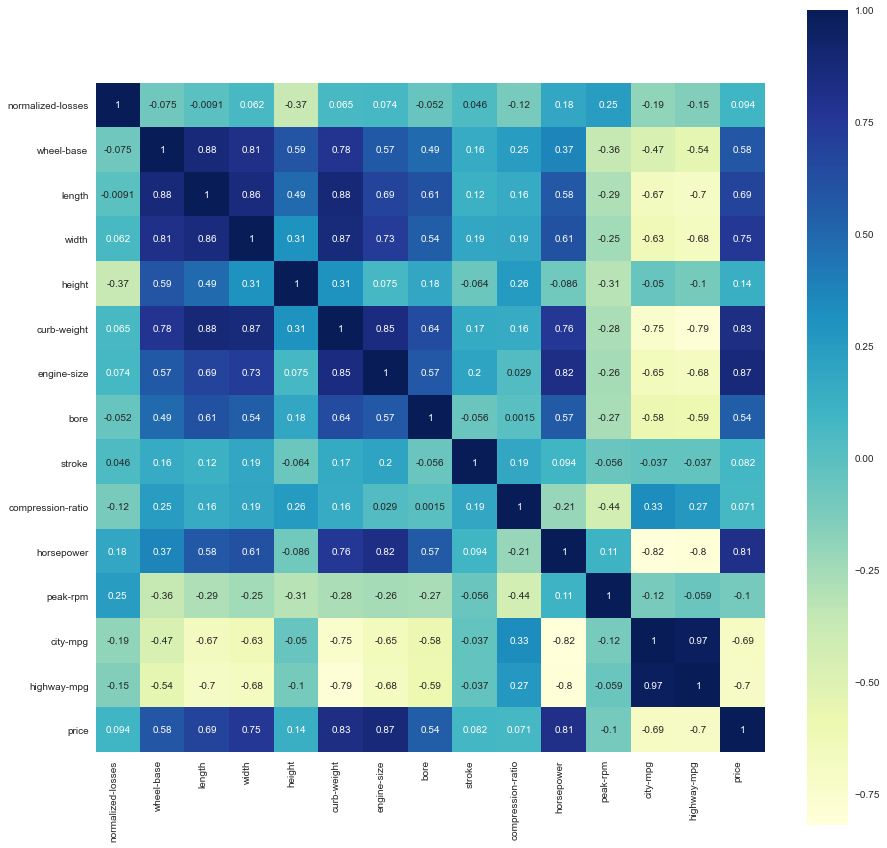

In [ ]:
plt.figure(figsize = (15,15))
kor = sns.heatmap(korelasi,
    annot = True,
    cmap = 'YlGnBu',
    square = True)

kor.set_xticklabels(
    kor.get_xticklabels(),
    horizontalalignment='right'
);

Melalui korelasi, diperoleh arah hubungan dan kekuatan hubungan antar variabel
- Variabel yang memiliki korelasi positif paling tinggi adalah variabel highway-mpg dengan variabel city-mpg
- Variabel yang memiliki korelasi negatif paling tinggi adalah variabel city-mpg dengan horsepower

**Membuat histogram untuk masing-masing variabel numerik**

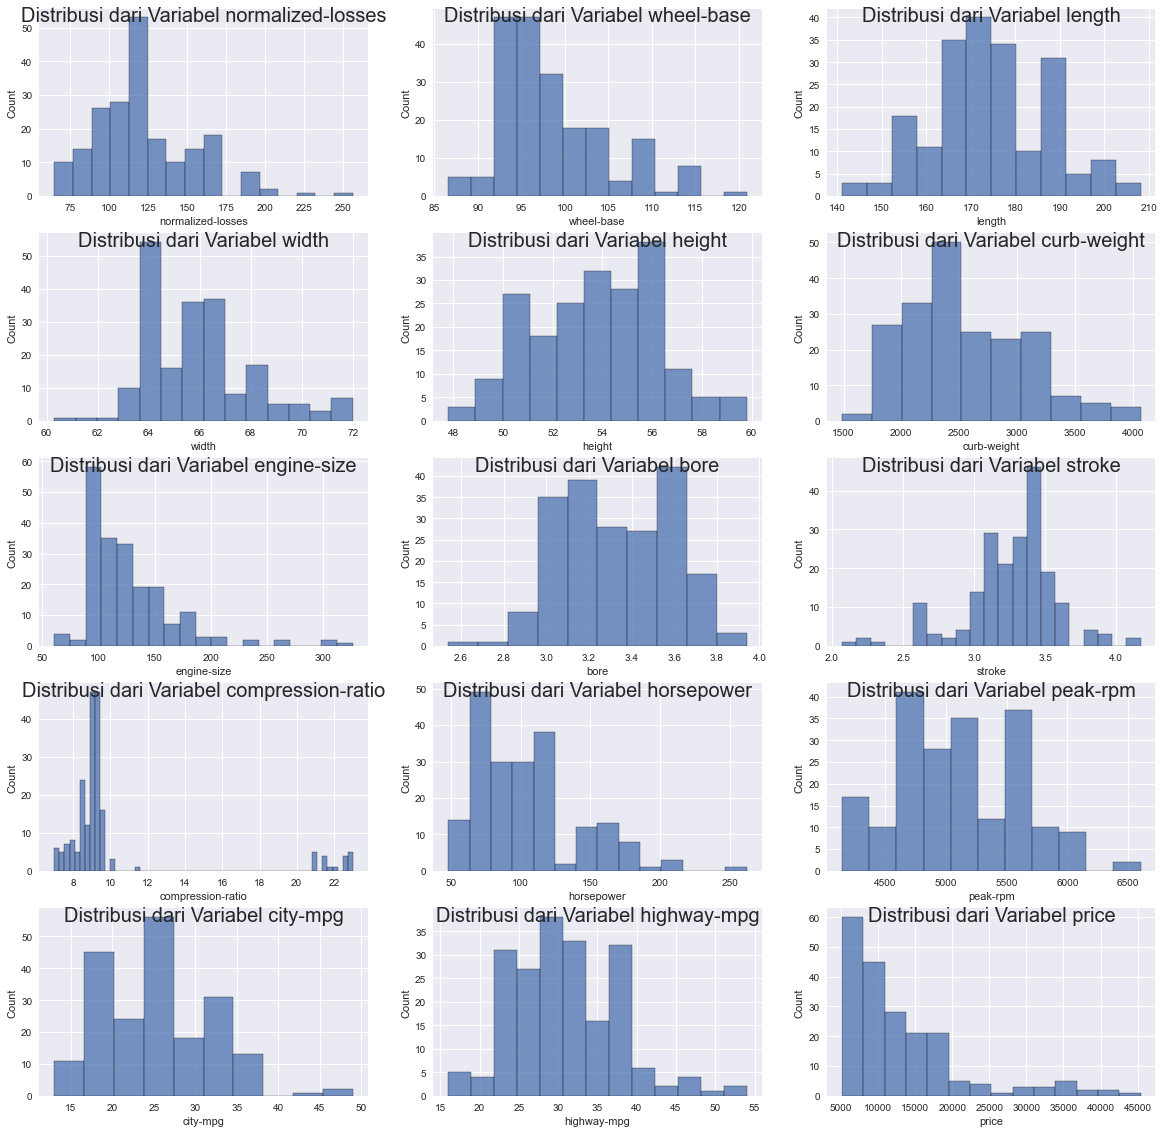

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(20,20))

for i, feature in enumerate(numerik,1):
    plt.subplot(5, 3, i)
    sns.histplot(mobil[feature])
    
    plt.title('Distribusi dari Variabel {}'.format(feature), size=20, y=0.9)

**Merk mobil apa yang menghasilkan harga tertinggi**

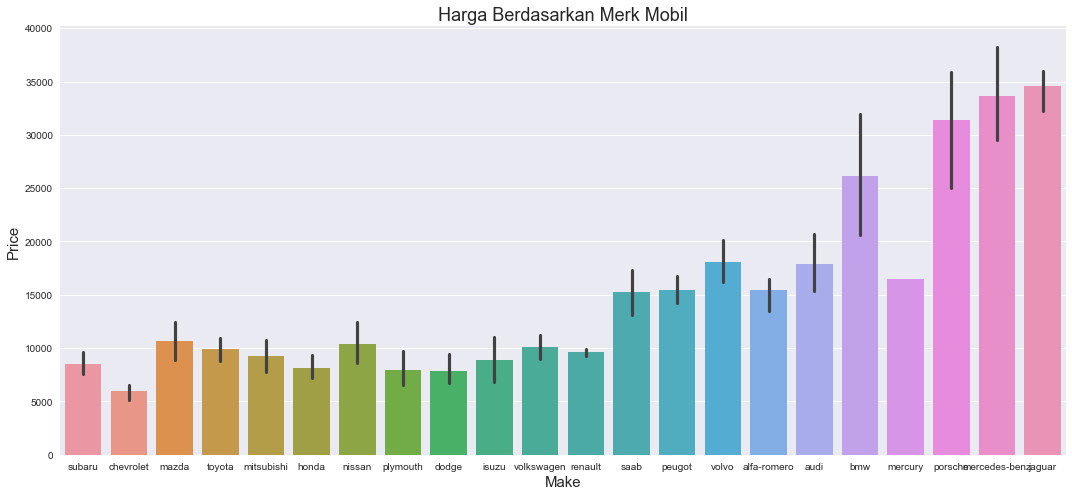

In [ ]:
mobil1 = mobil.sort_values('price',ascending=True)

plt.style.use('seaborn')
plt.figure(figsize = (15, 7))

sns.barplot(x = 'make',
            y = 'price', 
            data = mobil1)
plt.xlabel('Make', size=15)
plt.ylabel('Price', size=15)
plt.title('Harga Berdasarkan Merk Mobil', size=18)

plt.tight_layout()

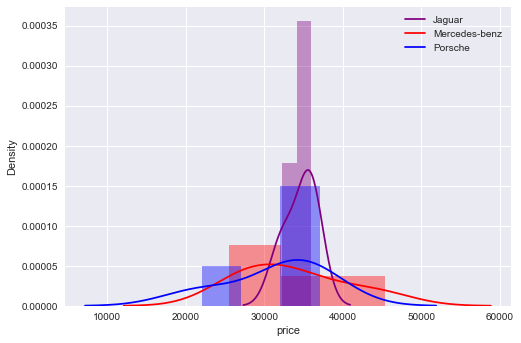

In [ ]:
sns.distplot(mobil[mobil['make'] == 'jaguar']['price'], color = 'purple')
sns.distplot(mobil[mobil['make'] == 'mercedes-benz']['price'], color = 'red')
sns.distplot(mobil[mobil['make'] == 'porsche']['price'], color = 'blue')
plt.legend(labels = ['Jaguar', 'Mercedes-benz', 'Porsche'])

Berdasarkan barplot di atas, pendapatan tertinggi berasal dari merk jaguar, kemudian disusul oleh mercedes-benz dan selanjutnya oleh porsche. Namun, berdasarkan tiga merk dengan pendapatan tertinggi tersebut diperoleh hasil bahwa Mercedes-benz memiliki harga yang lebih tinggi dibanding jaguar dan porsche. Diantara ketiga merk tersebut, porsche memiliki harga yang paling rendah

**Apakah jumlah pintu dari mobil berpengaruh terhadap harga mobil?**

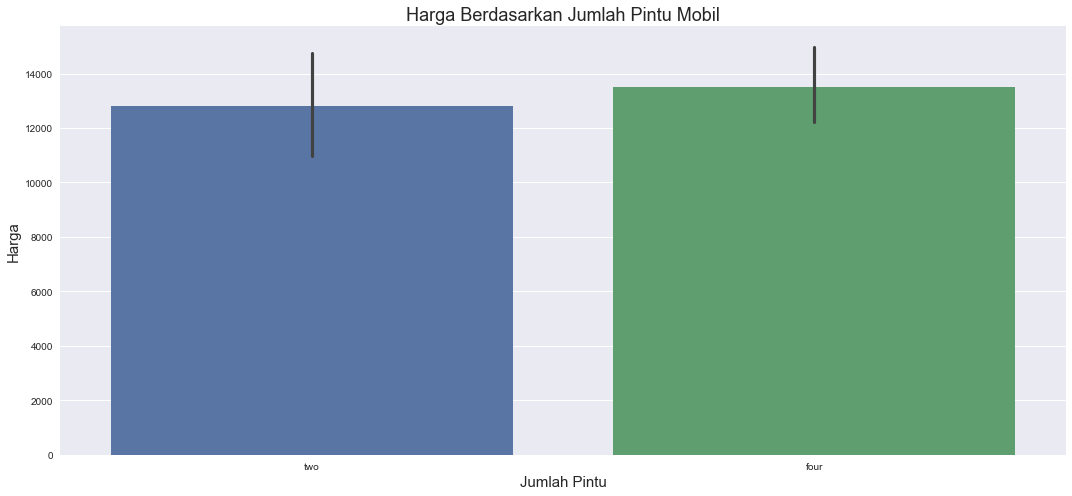

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (15,7))

sns.barplot(x = 'num-of-doors',
            y = 'price',
            data = mobil)
plt.xlabel('Jumlah Pintu', size=15)
plt.ylabel('Harga', size=15)
plt.title('Harga Berdasarkan Jumlah Pintu Mobil', size=18)

plt.tight_layout()

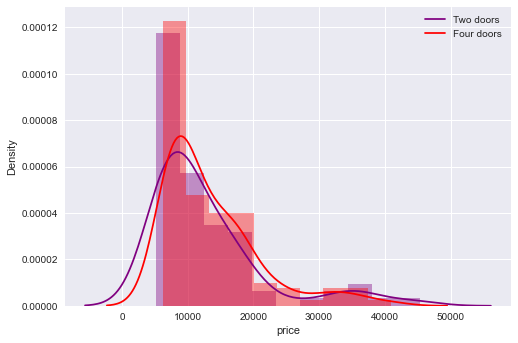

In [ ]:
sns.distplot(mobil[mobil['num-of-doors'] == 'two']['price'], color = 'purple')
sns.distplot(mobil[mobil['num-of-doors'] == 'four']['price'], color = 'red')
plt.legend(labels = ['Two doors', 'Four doors'])

Berdasarkan barplot di atas, total jumlah pembelian kendaraan dengan 4 pintu lebih tinggi dibandingkan kendaraan dengan dua pintu. Namun, berdasarkan plot persebaran harga, mobil dengan 2 pintu memiliki range harga yang lebih luas dibanding dengan mobil dengan 4 pintu. Dimana pada mobil dengan 2 pintu terdapat harga yang lebih murah dan juga terdapat harga yang lebih mahal dibandingkan dengan mobil 4 pintu

**Apakah symboling memengaruhi normalized-loss?**

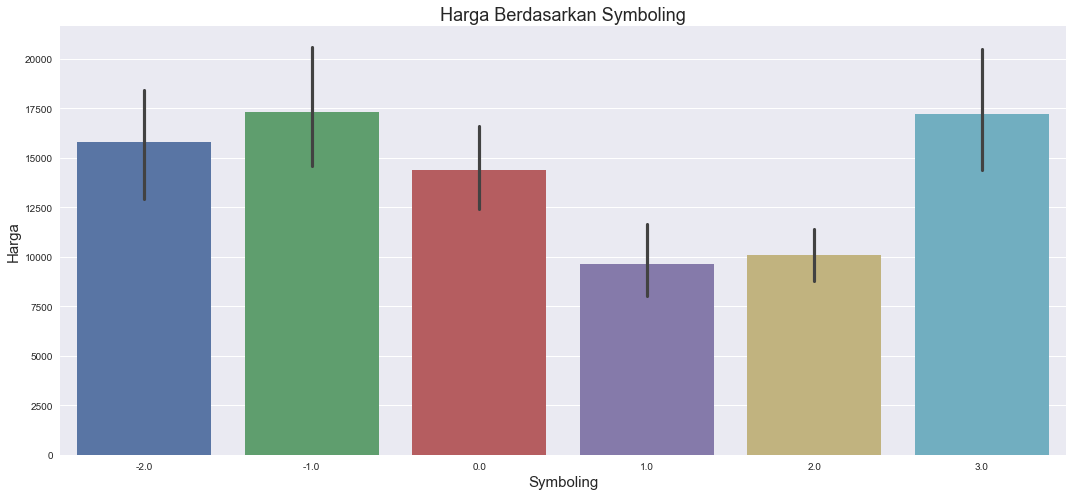

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (15,7))

sns.barplot(x = 'symboling',
            y = 'price',
            data = mobil)
plt.xlabel('Symboling', size=15)
plt.ylabel('Harga', size=15)
plt.title('Harga Berdasarkan Symboling', size=18)

plt.tight_layout()

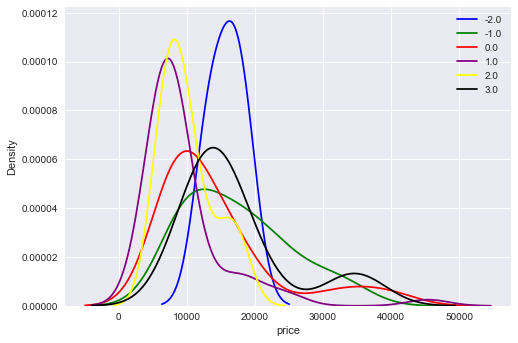

In [ ]:
sns.distplot(mobil[mobil['symboling'] == -2.0]['price'], color = 'blue', hist = False)
sns.distplot(mobil[mobil['symboling'] == -1.0]['price'], color = 'green', hist = False)
sns.distplot(mobil[mobil['symboling'] == 0.0]['price'], color = 'red', hist = False)
sns.distplot(mobil[mobil['symboling'] == 1.0]['price'], color = 'purple', hist = False)
sns.distplot(mobil[mobil['symboling'] == 2.0]['price'], color = 'yellow', hist = False)
sns.distplot(mobil[mobil['symboling'] == 3.0]['price'], color = 'black', hist = False)
plt.legend(labels = ['-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0'])

Berdasarkan plot di atas, tidak terdapat pola antara symboling dengan total harga, dimana harga bervariasi

**Apakah engine type memengaruhi harga mobil?**

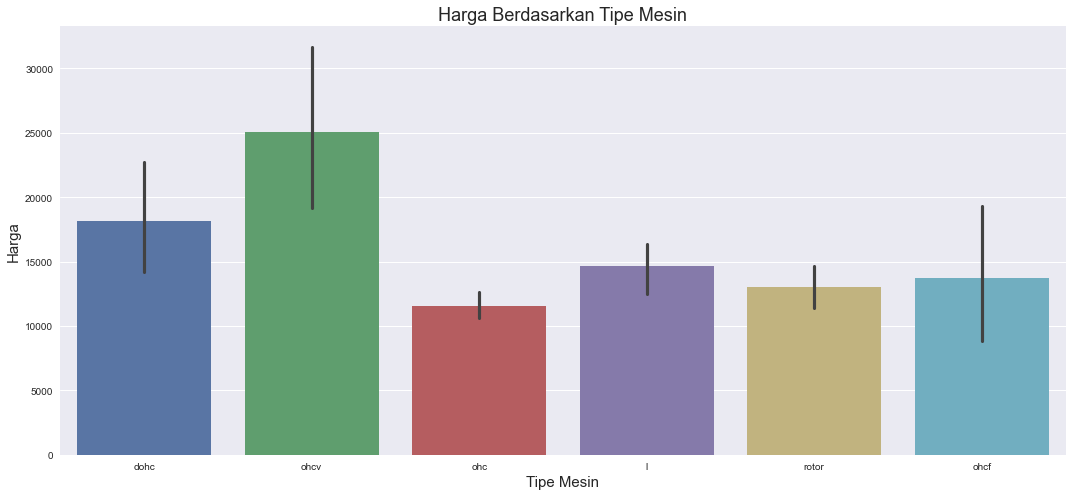

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (15,7))

sns.barplot(x = 'engine-type',
            y = 'price',
            data = mobil)
plt.xlabel('Tipe Mesin', size=15)
plt.ylabel('Harga', size=15)
plt.title('Harga Berdasarkan Tipe Mesin', size=18)

plt.tight_layout()

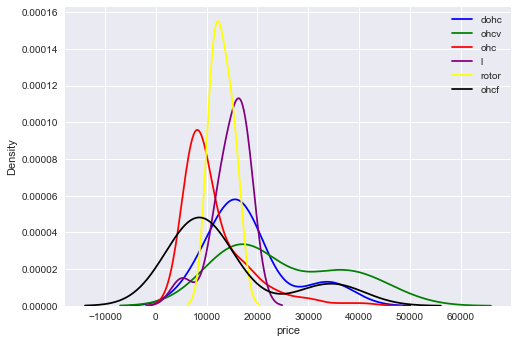

In [ ]:
sns.distplot(mobil[mobil['engine-type'] == 'dohc']['price'], color = 'blue', hist = False)
sns.distplot(mobil[mobil['engine-type'] == 'ohcv']['price'], color = 'green', hist = False)
sns.distplot(mobil[mobil['engine-type'] == 'ohc']['price'], color = 'red', hist = False)
sns.distplot(mobil[mobil['engine-type'] == 'l']['price'], color = 'purple', hist = False)
sns.distplot(mobil[mobil['engine-type'] == 'rotor']['price'], color = 'yellow', hist = False)
sns.distplot(mobil[mobil['engine-type'] == 'ohcf']['price'], color = 'black', hist = False)
plt.legend(labels = ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'])

Berdasarkan plot tipe mesin dengan harga, tipe mesin ohcv memiliki harga paling tinggi

In [ ]:
mobil.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,32.111623,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preparation

#### Encode Data

In [ ]:
mobil.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [ ]:
#cek berapa banyak kategori masin-masing
mobil['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
#Membuat variabel data non ordinal, ordinal, dan encode
non_ordinal = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
label_encode = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
ordinal = ['num-of-cylinders']

### Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for kolom in label_encode:
    mobil[kolom] = le.fit_transform(mobil[kolom])

In [ ]:
mobil.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


**One Hot Encoding**

In [ ]:
mobil = pd.get_dummies(mobil, columns = non_ordinal)

In [ ]:
mobil.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,four,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,four,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,115.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,six,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2.0,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,four,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,five,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**Untuk yang ordinal**

In [ ]:
mobil['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
num_replace = { 
    'num-of-cylinders' : {'four' : 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve' : 12, 'two' : 2, 'eight' : 8}
}

mobil.replace(num_replace, inplace = True)

In [ ]:
mobil.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,115.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2.0,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    float64
 1   normalized-losses       201 non-null    float64
 2   fuel-type               201 non-null    int32  
 3   aspiration              201 non-null    int32  
 4   num-of-doors            201 non-null    int32  
 5   engine-location         201 non-null    int32  
 6   wheel-base              201 non-null    float64
 7   length                  201 non-null    float64
 8   width                   201 non-null    float64
 9   height                  201 non-null    float64
 10  curb-weight             201 non-null    float64
 11  num-of-cylinders        201 non-null    int64  
 12  engine-size             201 non-null    float64
 13  bore                    201 non-null    float64
 14  stroke                  201 non-null    fl

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = mobil.drop('price', axis = 1)
y = mobil['price']

In [ ]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,115.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2.0,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,1,0,0,0,109.1,188.8,68.9,55.5,2952.0,4,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
197,-1.0,95.0,1,1,0,0,109.1,188.8,68.8,55.5,3049.0,4,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
198,-1.0,95.0,1,0,0,0,109.1,188.8,68.9,55.5,3012.0,6,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
199,-1.0,95.0,0,1,0,0,109.1,188.8,68.9,55.5,3217.0,6,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41)

In [ ]:
x_train.shape

(160, 64)

In [ ]:
x_test.shape

(41, 64)

# MODELING TANPA SCALING

**Linear Regression**

<AxesSubplot:xlabel='price', ylabel='Density'>

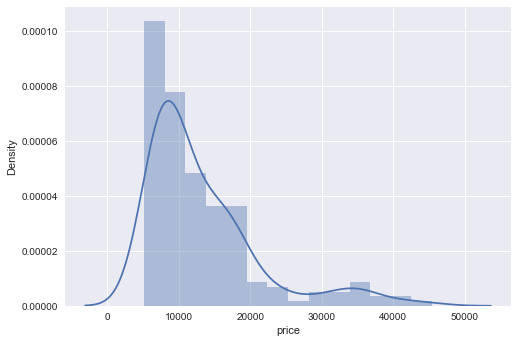

In [ ]:
# Mengecek normalitas
sns.distplot(mobil['price'])

Distribusi dari variabel y memiliki kecenderungan kemiringan (skewness) ke kanan. Sehingga, data tersebut tidak berdistribusi normal dan tidak dapat dilakukan analisis menggunakan regresi linier.

**1. Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor()

In [ ]:
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dtr = DTR.predict(x_test)

In [ ]:
#evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

In [ ]:
print('R-Squared Decision Tree Regressor :', r2_dtr)
print('RMSE Decision Tree Regressor :', rmse_dtr)
print('MAE Decision Tree Regressor :', mae_dtr)

R-Squared Decision Tree Regressor : 0.8874141417050876
RMSE Decision Tree Regressor : 2546.640771587582
MAE Decision Tree Regressor : 1672.780487804878


**2. Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
#modeling
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfr = RFR.predict(x_test)

In [ ]:
r2_rfr = r2_score(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

In [ ]:
print('R-Squared Random Forest Regressor :', r2_rfr)
print('RMSE Random Forest Regressor :', rmse_rfr)
print('MAE Random Forest Regressor :', mae_rfr)

R-Squared Random Forest Regressor : 0.921245198214568
RMSE Random Forest Regressor : 2129.9248852922306
MAE Random Forest Regressor : 1478.280717189315


**3. Xgboost Regression**

In [ ]:
import xgboost as xg 

In [ ]:
xgb = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 41) 

In [ ]:
# Fitting the model 
xgb.fit(x_train, y_train) 

[13:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=41, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=41, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
# Predict the model 
y_pred_xgb = xgb.predict(x_test) 

In [ ]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

In [ ]:
print('R-Squared Xgboost :', r2_xgb)
print('RMSE Xgboost :', rmse_xgb)
print('MAE Xgboost :', mae_xgb)

R-Squared Xgboost : 0.9080244608814966
RMSE Xgboost : 2301.7700635624674
MAE Xgboost : 1687.1587390434452


**4. Logistic Regression**

Binning data

In [ ]:
#Mengkategorikan variabel price ke dalam 3 bagian : Low, Medium, High
rentang = int((max(mobil['price']) - min(mobil['price']))/3)
rentang

13427

In [ ]:
bins = range(int(min(mobil['price'])), int(max(mobil['price'])), rentang)
rentang

13427

In [ ]:
mobil_log = mobil.copy()

In [ ]:
mobil_log['price_kat'] = pd.cut(mobil_log['price'], bins, labels = ['Low', 'Medium', 'High'])

In [ ]:
mobil_log.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price_kat
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,Low
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,Low
2,1.0,115.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,Low
3,2.0,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,Low
4,2.0,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,Low


In [ ]:
mobil_log['price_kat'].dtypes

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [ ]:
replace_price = { 
    'price_kat' : {'Low' : 1, 'Medium' : 2, 'High' : 3}
}

mobil_log.replace(replace_price, inplace = True)

In [ ]:
mobil_log['price_kat'].isnull().sum()

2

In [ ]:
#Melihat data yang berisi null value di variabel price_kat
mobil_log['price_kat'].sort_values(ascending=False)

69     3.0
44     3.0
15     3.0
16     3.0
46     3.0
      ... 
128    1.0
127    1.0
0      1.0
71     NaN
134    NaN
Name: price_kat, Length: 201, dtype: float64

In [ ]:
mobil_log[71:135]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price_kat
71,1.0,115.0,1,0,1,0,112.0,199.2,72.0,55.4,3715.0,8,304.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,45400.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,NaN
72,1.0,115.0,1,1,1,0,102.7,178.4,68.0,54.8,2910.0,4,140.0,3.78,3.12,8.0,175.0,5000.0,19.0,24.0,16503.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0
73,2.0,161.0,1,0,1,0,93.7,157.3,64.4,50.8,1918.0,4,92.0,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,5389.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
74,2.0,161.0,1,0,1,0,93.7,157.3,64.4,50.8,1944.0,4,92.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6189.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
75,2.0,161.0,1,0,1,0,93.7,157.3,64.4,50.8,2004.0,4,92.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6669.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,3.0,150.0,1,0,1,0,99.1,186.6,66.5,56.1,2707.0,4,121.0,2.54,2.07,9.3,110.0,5250.0,21.0,28.0,15040.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0
131,2.0,104.0,1,0,0,0,99.1,186.6,66.5,56.1,2758.0,4,121.0,3.54,3.07,9.3,110.0,5250.0,21.0,28.0,15510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0
132,3.0,150.0,1,1,1,0,99.1,186.6,66.5,56.1,2808.0,4,121.0,3.54,3.07,9.0,160.0,5500.0,19.0,26.0,18150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
133,2.0,104.0,1,1,0,0,99.1,186.6,66.5,56.1,2847.0,4,121.0,3.54,3.07,9.0,160.0,5500.0,19.0,26.0,18620.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0


In [ ]:
mobil_log['price_kat'][71] = '3'

In [ ]:
mobil_log['price_kat'][134] = '1'

In [ ]:
mobil_log[71:135]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price_kat
71,1.0,115.0,1,0,1,0,112.0,199.2,72.0,55.4,3715.0,8,304.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,45400.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3.0
72,1.0,115.0,1,1,1,0,102.7,178.4,68.0,54.8,2910.0,4,140.0,3.78,3.12,8.0,175.0,5000.0,19.0,24.0,16503.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0
73,2.0,161.0,1,0,1,0,93.7,157.3,64.4,50.8,1918.0,4,92.0,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,5389.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
74,2.0,161.0,1,0,1,0,93.7,157.3,64.4,50.8,1944.0,4,92.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6189.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
75,2.0,161.0,1,0,1,0,93.7,157.3,64.4,50.8,2004.0,4,92.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6669.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,3.0,150.0,1,0,1,0,99.1,186.6,66.5,56.1,2707.0,4,121.0,2.54,2.07,9.3,110.0,5250.0,21.0,28.0,15040.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0
131,2.0,104.0,1,0,0,0,99.1,186.6,66.5,56.1,2758.0,4,121.0,3.54,3.07,9.3,110.0,5250.0,21.0,28.0,15510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0
132,3.0,150.0,1,1,1,0,99.1,186.6,66.5,56.1,2808.0,4,121.0,3.54,3.07,9.0,160.0,5500.0,19.0,26.0,18150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
133,2.0,104.0,1,1,0,0,99.1,186.6,66.5,56.1,2847.0,4,121.0,3.54,3.07,9.0,160.0,5500.0,19.0,26.0,18620.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0


In [ ]:
mobil_log.isnull().sum()

symboling            0
normalized-losses    0
fuel-type            0
aspiration           0
num-of-doors         0
                    ..
fuel-system_mfi      0
fuel-system_mpfi     0
fuel-system_spdi     0
fuel-system_spfi     0
price_kat            0
Length: 66, dtype: int64

In [ ]:
mobil_log['price_kat'] = mobil_log['price_kat'].astype('int')

In [ ]:
mobil_log['price_kat'] = mobil_log['price_kat'].astype('str')

In [ ]:
mobil_log['price_kat'].dtype

dtype('O')

In [ ]:
mobil_log

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price_kat
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1.0,115.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,2.0,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2.0,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,1,0,0,0,109.1,188.8,68.9,55.5,2952.0,4,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
197,-1.0,95.0,1,1,0,0,109.1,188.8,68.8,55.5,3049.0,4,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2
198,-1.0,95.0,1,0,0,0,109.1,188.8,68.9,55.5,3012.0,6,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2
199,-1.0,95.0,0,1,0,0,109.1,188.8,68.9,55.5,3217.0,6,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2


Membuat Model Logistic Regression

In [ ]:
import imblearn

from collections import Counter
from sklearn.datasets import make_classification

#library sampling
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_log = mobil_log.drop(['price', 'price_kat'], axis = 1)
y_log = mobil_log['price_kat']

In [ ]:
print(Counter(y_log))
#Data imbalanced

Counter({'1': 171, '2': 18, '3': 12})


In [ ]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=41)

In [ ]:
Counter(y_train_log)

Counter({'1': 137, '2': 13, '3': 10})

In [ ]:
#oversampling
smote = SMOTE()

# fit and apply
x_smote, y_smote = smote.fit_resample(x_train_log, y_train_log)

#liat hasil
print(Counter(y_smote))

Counter({'1': 137, '2': 137, '3': 137})


In [ ]:
#Model Regresi Logistik
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_smote, y_smote)

LogisticRegression()

In [ ]:
#predict
y_pred_logreg = logreg.predict(x_test_log)

Evaluation

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

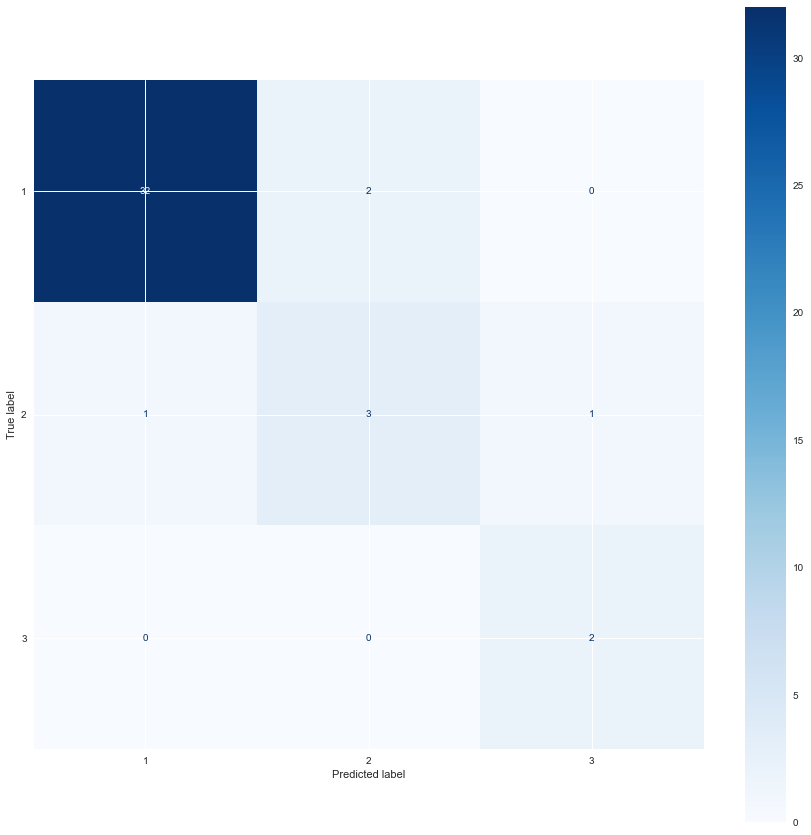

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(logreg, x_test_log, y_test_log, cmap=plt.cm.Blues, ax = ax)
plt.show()

In [ ]:
print(classification_report(y_test_log, y_pred_logreg))

              precision    recall  f1-score   support

           1       0.97      0.94      0.96        34
           2       0.60      0.60      0.60         5
           3       0.67      1.00      0.80         2

    accuracy                           0.90        41
   macro avg       0.75      0.85      0.79        41
weighted avg       0.91      0.90      0.90        41



**5. K-Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#modeling
knn.fit(x_smote, y_smote)

KNeighborsClassifier()

In [ ]:
#predict
y_pred_knn = knn.predict(x_test_log)

Evaluation

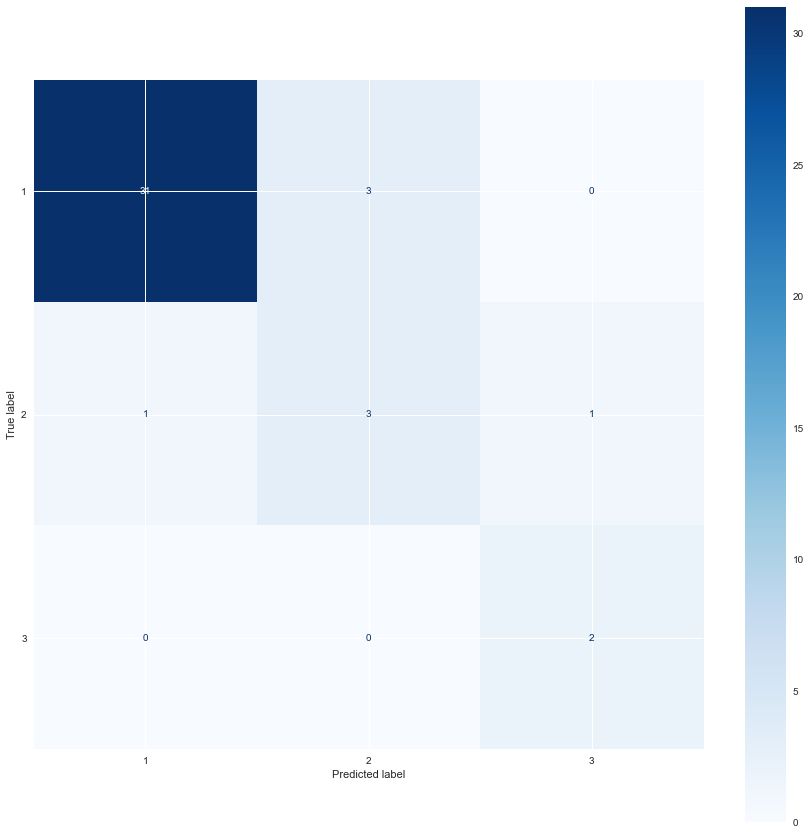

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(knn, x_test_log, y_test_log, cmap=plt.cm.Blues, ax = ax)
plt.show()

In [ ]:
print(classification_report(y_test_log, y_pred_knn))

              precision    recall  f1-score   support

           1       0.97      0.91      0.94        34
           2       0.50      0.60      0.55         5
           3       0.67      1.00      0.80         2

    accuracy                           0.88        41
   macro avg       0.71      0.84      0.76        41
weighted avg       0.90      0.88      0.88        41



### HYPERPARAMETER TUNING

In [ ]:
#import gridsearch
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params_nonscale = {
    'DTR': {
        'model': DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
            'splitter': ['best', 'random'],
            'max_features' : ['auto', 'sqrt', 'log2']
        } 
    },
    'RFR': {
        'model': RandomForestRegressor(),
        'params' : {
            'criterion' : ['mse', 'mae'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'Xgboost' : {
        'model' : xg.XGBRegressor(),
        'params' : {
            'booster' : ['gbtree', 'gblinear', 'dart'],
            'importance_type' : ['gain', 'weight', 'cover','total_gain', 'total_cover']
        }
    }
}

#c adalah area under roc value

In [ ]:
scores = []

for model_name, mp in model_params_nonscale.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,DTR,0.424139,"{'criterion': 'friedman_mse', 'max_features': ..."
1,RFR,0.660821,"{'criterion': 'mae', 'max_features': 'log2', '..."
2,Xgboost,0.473304,"{'booster': 'gblinear', 'importance_type': 'co..."


In [ ]:
df1['best_params'][1]

{'criterion': 'mae', 'max_features': 'log2', 'n_jobs': -1}

In [ ]:
model_params_kat = {
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
            
        }
    }
}

#c adalah area under roc value

In [ ]:
scores = []

for model_name, mp in model_params_kat.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False)
    clf.fit(x_log, y_log)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,logistic_regression,0.865488,"{'C': 8.0, 'multi_class': 'ovr', 'n_jobs': -1,..."
1,knn,0.860610,"{'algorithm': 'auto', 'weights': 'distance'}"


In [ ]:
df2['best_params'][0]

{'C': 8.0,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'liblinear'}

**Feature Importance Random Forest Regressor**

In [ ]:
model = RandomForestRegressor(criterion = 'mae', max_features = 'log2', n_jobs = -1)

In [ ]:
model.fit(x, y)

RandomForestRegressor(criterion='mae', max_features='log2', n_jobs=-1)

In [ ]:
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

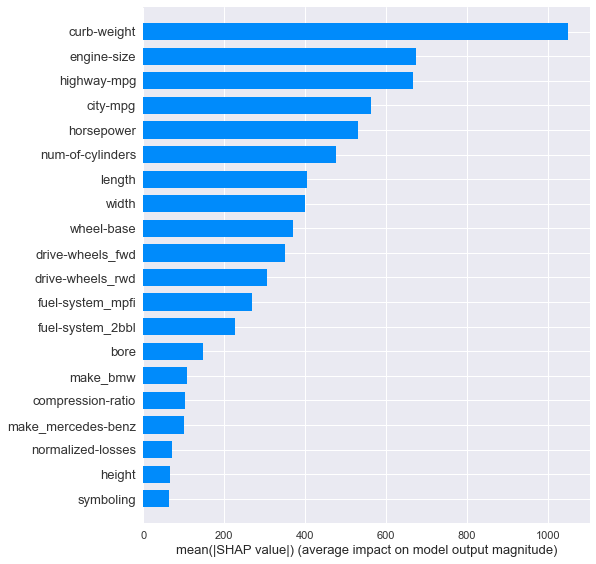

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

**Model nonscaling tanpa binning yang terbaik dihasilkan oleh Random Forest Regressor, dengan parameter terbaiknya adalah criterion: mae, max_features: log2, n_jobs: -1. Variabel atau fitur yang memiliki peranan paling penting dalam pemodelan terhadap harga adalah variabel curb-weight. Selanjutnya secara berturut-turut yang terpenting adalah variabel engine-soze, highway-mpg, city-mpg, dan horsepower**

**Feature Importance Logistic Regression**

In [ ]:
model1 = LogisticRegression(C = 10.0, multi_class = 'auto', penalty = 'l1', solver = 'liblinear', n_jobs = -1)

In [ ]:
model1.fit(x_log, y_log)

LogisticRegression(C=10.0, n_jobs=-1, penalty='l1', solver='liblinear')

In [ ]:
importance1 = model1.coef_[0]

In [ ]:
importance1

array([-1.52392773e+00,  3.72328637e-02,  0.00000000e+00, -4.93494984e+00,
        2.36025147e+00,  0.00000000e+00, -7.57119505e-02,  2.68846262e-02,
       -6.68205679e-01,  7.33200588e-01, -8.00765574e-05, -1.94826752e+00,
       -3.84951257e-02,  0.00000000e+00,  3.74355144e+00, -1.34268016e+00,
       -5.10383973e-03, -5.88832902e-05,  3.02094215e+00, -1.29757148e+00,
        0.00000000e+00,  0.00000000e+00, -1.00157876e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.94675301e+00,  0.00000000e+00,  0.00000000e+00, -1.19054579e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.31136747e-01,
        0.00000000e+00, -1.56727004e+00,  0.00000000e+00,  0.00000000e+00,
        2.33631229e+00,  0.00000000e+00, -1.70427375e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.85037181e+00,  

In [ ]:
kolom1 = list(x_log.columns)

In [ ]:
model1.coef_[0]

array([-1.52392773e+00,  3.72328637e-02,  0.00000000e+00, -4.93494984e+00,
        2.36025147e+00,  0.00000000e+00, -7.57119505e-02,  2.68846262e-02,
       -6.68205679e-01,  7.33200588e-01, -8.00765574e-05, -1.94826752e+00,
       -3.84951257e-02,  0.00000000e+00,  3.74355144e+00, -1.34268016e+00,
       -5.10383973e-03, -5.88832902e-05,  3.02094215e+00, -1.29757148e+00,
        0.00000000e+00,  0.00000000e+00, -1.00157876e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.94675301e+00,  0.00000000e+00,  0.00000000e+00, -1.19054579e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.31136747e-01,
        0.00000000e+00, -1.56727004e+00,  0.00000000e+00,  0.00000000e+00,
        2.33631229e+00,  0.00000000e+00, -1.70427375e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.85037181e+00,  

In [ ]:
pd.value_counts(kolom1)

make_saab            1
engine-size          1
make_alfa-romero     1
make_peugot          1
body-style_sedan     1
                    ..
city-mpg             1
symboling            1
engine-type_rotor    1
fuel-type            1
make_plymouth        1
Length: 64, dtype: int64

In [ ]:
df_imp1 = pd.DataFrame({'columns' : kolom1,
                      'Importance' : importance1})

In [ ]:
df_imp1

,columns,Importance
0,symboling,-1.523928
1,normalized-losses,0.037233
2,fuel-type,0.000000
3,aspiration,-4.934950
4,num-of-doors,2.360251
...,...,...
59,fuel-system_idi,0.000000
60,fuel-system_mfi,0.000000
61,fuel-system_mpfi,-1.128268
62,fuel-system_spdi,0.000000


<AxesSubplot:xlabel='columns'>

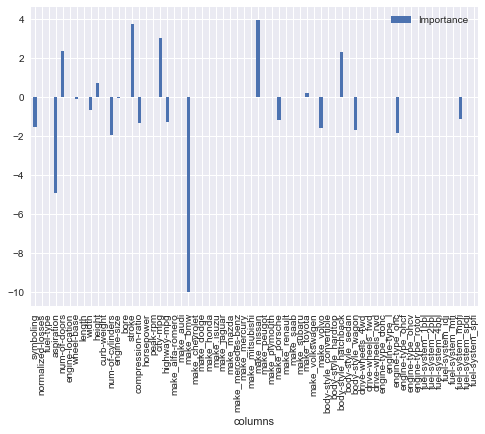

In [ ]:
df_imp1.set_index('columns').plot.bar()

In [ ]:
#dimutlakkann supaya terlihat jelas
def mutlak(x):
    if x['Importance'] <0:
        return x['Importance']*-1
    else:
        return x['Importance']
df_imp1['Value'] = df_imp1.apply(lambda x: mutlak(x), axis=1)

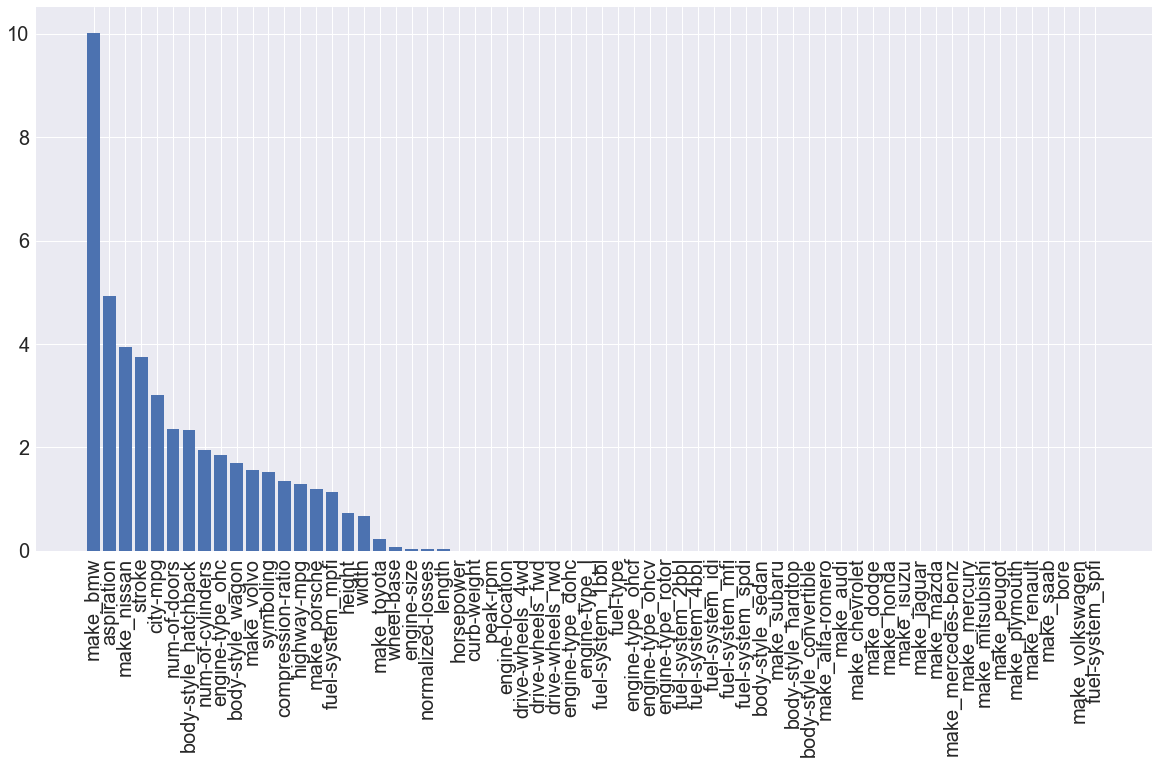

In [ ]:
plt.figure(figsize = (20,10))
df_sorted = df_imp1.sort_values(by='Value', ascending=False)
plt.bar('columns', 'Value', data = df_sorted)
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.show()

**Model nonscaling dengan binning data respons yang terbaik dihasilkan oleh logistic regression, dengan parameter terbaiknya adalah C = 10.0, multi_class = auto, penalty = l1, solver = liblinear, n_jobs = -1. Variabel atau fitur yang memiliki peranan paling penting dalam pemodelan terhadap harga adalah variabel make_bmw (merk mobil bmw). Selanjutnya secara berturut-turut yang terpenting adalah variabel aspiration, stroke, make_nissan(merk mobil nissan), city-mpg**

# DENGAN SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
mobil1 = mobil.copy()

In [ ]:
mobil1['normalized-losses'] = scaler.fit_transform(np.array(mobil1['normalized-losses']).reshape(-1,1))
mobil1['wheel-base'] = scaler.fit_transform(np.array(mobil1['wheel-base']).reshape(-1,1))
mobil1['length'] = scaler.fit_transform(np.array(mobil1['length']).reshape(-1,1))
mobil1['width'] = scaler.fit_transform(np.array(mobil1['width']).reshape(-1,1))
mobil1['height'] = scaler.fit_transform(np.array(mobil1['height']).reshape(-1,1))
mobil1['curb-weight'] = scaler.fit_transform(np.array(mobil1['curb-weight']).reshape(-1,1))
mobil1['engine-size'] = scaler.fit_transform(np.array(mobil1['engine-size']).reshape(-1,1))
mobil1['bore'] = scaler.fit_transform(np.array(mobil1['bore']).reshape(-1,1))
mobil1['stroke'] = scaler.fit_transform(np.array(mobil1['stroke']).reshape(-1,1))
mobil1['compression-ratio'] = scaler.fit_transform(np.array(mobil1['compression-ratio']).reshape(-1,1))
mobil1['horsepower'] = scaler.fit_transform(np.array(mobil1['horsepower']).reshape(-1,1))
mobil1['peak-rpm'] = scaler.fit_transform(np.array(mobil1['peak-rpm']).reshape(-1,1))
mobil1['city-mpg'] = scaler.fit_transform(np.array(mobil1['city-mpg']).reshape(-1,1))
mobil1['highway-mpg'] = scaler.fit_transform(np.array(mobil1['highway-mpg']).reshape(-1,1))
mobil1['price'] = scaler.fit_transform(np.array(mobil1['price']).reshape(-1,1))
mobil1['symboling'] = scaler.fit_transform(np.array(mobil1['symboling']).reshape(-1,1))
mobil1['num-of-cylinders'] = scaler.fit_transform(np.array(mobil1['num-of-cylinders']).reshape(-1,1))

In [ ]:
mobil1

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.261780,1,0,1,0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,0.207959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0.261780,1,0,1,0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,0.282558,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.6,0.261780,1,0,1,0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,0.282558,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.8,0.518325,1,0,0,0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,0.219254,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.8,0.518325,1,0,0,0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,0.306142,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.2,0.157068,1,0,0,0,0.655977,0.711940,0.735043,0.641667,0.567882,0.2,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,0.291123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
197,0.2,0.157068,1,1,0,0,0.655977,0.711940,0.726496,0.641667,0.605508,0.2,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,0.345738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
198,0.2,0.157068,1,0,0,0,0.655977,0.711940,0.735043,0.641667,0.591156,0.4,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,0.406311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
199,0.2,0.157068,0,1,0,0,0.655977,0.711940,0.735043,0.641667,0.670675,0.4,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,0.430763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

In [ ]:
x1 = mobil1.drop('price', axis = 1)
y1 = mobil1['price']

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [ ]:
x1_train.shape

(160, 64)

In [ ]:
x1_test.shape

(41, 64)

<AxesSubplot:xlabel='price', ylabel='Density'>

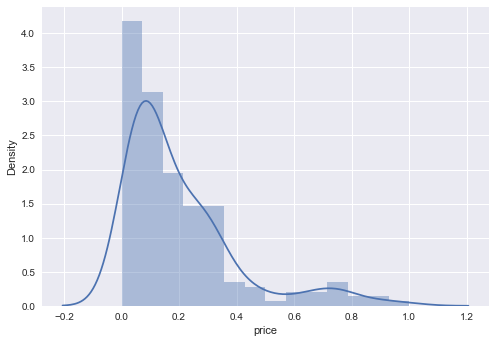

In [ ]:
sns.distplot(mobil1['price'])

Variabel y pada data memiliki distribusi yang condong ke kanan, sehingga data tidak normal dan tidak dapat dilakukan analisis regresi linier

**1. Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor()

In [ ]:
DTR.fit(x1_train, y1_train)

DecisionTreeRegressor()

In [ ]:
y1_pred = DTR.predict(x1_test)

In [ ]:
#evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
r2_dtr1 = r2_score(y1_test, y1_pred)
mse_dtr1 = mean_squared_error(y1_test, y1_pred)
mae_dtr1 = mean_absolute_error(y1_test, y1_pred)
rmse_dtr1 = np.sqrt(mse_dtr1)

In [ ]:
print('R-Squared :', r2_dtr1)
print('RMSE :', rmse_dtr1)
print('MAE :', mae_dtr1)

R-Squared : 0.9089025403385423
RMSE : 0.08287782930317404
MAE : 0.05281757511979569


**2. Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
#modeling
RFR.fit(x1_train, y1_train)

RandomForestRegressor()

In [ ]:
y2_pred = RFR.predict(x1_test)

In [ ]:
r2_rfr1 = r2_score(y1_test, y2_pred)
mse_rfr1 = mean_squared_error(y1_test, y2_pred)
mae_rfr1 = mean_absolute_error(y1_test, y2_pred)
rmse_rfr1 = np.sqrt(mse_rfr1)

In [ ]:
print('R-Squared :', r2_rfr1)
print('RMSE :', rmse_rfr1)
print('MAE :', mae_rfr1)

R-Squared : 0.9360817302691529
RMSE : 0.06942209883700884
MAE : 0.045953880326624175


**3. Xgboost Regression**

In [ ]:
import xgboost as xg 

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 41) 

In [ ]:
# Fitting the model 
xgb_r.fit(x1_train, y1_train) 

[13:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=41, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=41, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
# Predict the model 
y_pred_xgb1 = xgb_r.predict(x1_test) 

In [ ]:
r2_xgb1 = r2_score(y1_test, y_pred_xgb1)
mse_xgb1 = mean_squared_error(y1_test, y_pred_xgb1)
mae_xgb1 = mean_absolute_error(y1_test, y_pred_xgb1)
rmse_xgb1 = np.sqrt(mse_xgb1)

In [ ]:
print('R-Squared Xgboost :', r2_xgb1)
print('RMSE Xgboost :', rmse_xgb1)
print('MAE Xgboost :', mae_xgb1)

R-Squared Xgboost : 0.9484821585340968
RMSE Xgboost : 0.062325254941888064
MAE Xgboost : 0.039789585210426026


### Hyperparameter Tuning

In [ ]:
#import gridsearch
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'DTR': {
        'model': DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
            'splitter': ['best', 'random'],
            'max_features' : ['auto', 'sqrt', 'log2']
        } 
    },
    'RFR': {
        'model': RandomForestRegressor(),
        'params' : {
            'criterion' : ['mse', 'mae'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'Xgboost' : {
        'model' : xg.XGBRegressor(),
        'params' : {
            'booster' : ['gbtree', 'gblinear', 'dart'],
            'importance_type' : ['gain', 'weight', 'cover','total_gain', 'total_cover']
            
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False)
    clf.fit(x1, y1)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df3 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df3

,model,best_score,best_params
0,DTR,0.618586,"{'criterion': 'mse', 'max_features': 'auto', '..."
1,RFR,0.638038,"{'criterion': 'mse', 'max_features': 'sqrt', '..."
2,Xgboost,0.325541,"{'booster': 'dart', 'importance_type': 'gain'}"


In [ ]:
df3['best_params'][1]

{'criterion': 'mse', 'max_features': 'sqrt', 'n_jobs': -1}

In [ ]:
model2 = RandomForestRegressor(criterion = 'mae', max_features = 'log2', n_jobs = -1)

In [ ]:
model2.fit(x1, y1)

RandomForestRegressor(criterion='mae', max_features='log2', n_jobs=-1)

**Feature Importance Logreg**

In [ ]:
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [ ]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(x1_test)

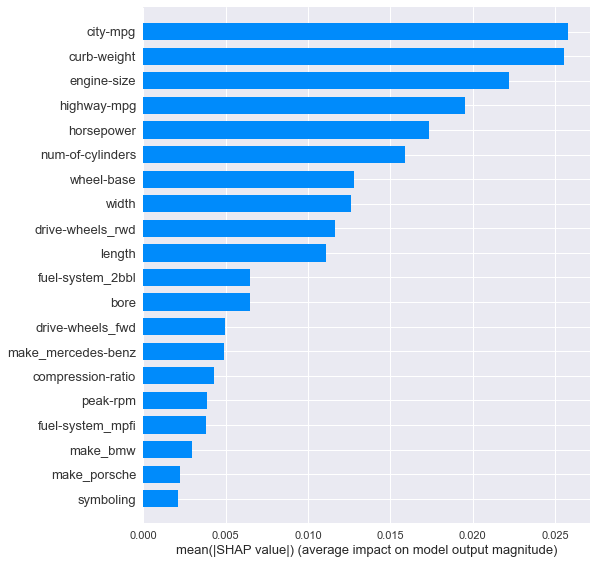

In [ ]:
shap.summary_plot(shap_values, x1_test, plot_type="bar")

**Model scaling yang terbaik dihasilkan oleh Random Forest Regressor, dengan parameter terbaiknya adalah criterion: mse, max_features: log2, n_jobs: -1. Variabel atau fitur yang memiliki peranan paling penting dalam pemodelan terhadap harga adalah variabel curb-weight. Selanjutnya secara berturut-turut yang terpenting adalah variabel highway-mpg, engine-size, city-mpg, dan horsepower**

### Hasil analisis

Berdasarkan hasil analisis tanpa menggunakan scaling, analisis yang diberikanterbagi menjadi dua, yaitu menggunakan binning dan tanpa menggunakan binning:
- Tanpa menggunakan binning model terbaik dihasilkan oleh metode Random Forest Regressor, dengan parameter terbaiknya adalah criterion: mae, max_features: log2, n_jobs: -1. Variabel atau fitur yang memiliki peranan paling penting dalam pemodelan terhadap harga adalah variabel curb-weight. Selanjutnya secara berturut-turut yang terpenting adalah variabel engine-soze, highway-mpg, city-mpg, dan horsepower.
- Dengan menggunakan binning respons yang terbaik dihasilkan oleh metode logistic regression, dengan parameter terbaiknya adalah C = 10.0, multi_class = auto, penalty = l1, solver = liblinear, n_jobs = -1. Variabel atau fitur yang memiliki peranan paling penting dalam pemodelan terhadap harga adalah variabel make_bmw (merk mobil bmw). Selanjutnya secara berturut-turut yang terpenting adalah variabel aspiration, stroke, make_nissan(merk mobil nissan), city-mpg.

Berdasarkan hasil analisis menggunakan scaling, diperoleh hasil:
- Nilai Rsquared dari masing-masing metode tidak jauh berbeda, oleh karena itu dilihat menggunakan Hyperparameter Tuning untuk mengetahui metode dengan best score dan best parameter.
- Berdasarkan hasil dari Hyperparameter Tuning, hasil yang diberikan adalah model dengan metode Random Forest Regressor dengan parameter criterion mse, max feature log 2, dan njobs -1 memberikan best score tertinggi.
- Melalui model ini, variabel yang memberikan kontribusi paling besar adalah variabel curb-weight